# Spam detection - 

In [ ]:
# import basix packages and dataset-
import os , sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spam.tsv to spam (2).tsv


In [ ]:
df = pd.read_csv('/content/spam.tsv',sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [ ]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [ ]:
#check imbalance dataset - 
df['label'].value_counts()/(len(df))*100

ham     86.593683
spam    13.406317
Name: label, dtype: float64

In [ ]:
ham = df[df['label']=='ham']
spam = df[df['label']=='spam']

In [ ]:
ham.shape,spam.shape

((4825, 4), (747, 4))

In [ ]:
# oversampling - ham = 4825,spam = 4825, total=9650
# undersampling - ham = 747, spam  = 747 , total = 1494

In [ ]:
# oversampling - target is minority class
spam = spam.sample(ham.shape[0],replace = True) 
spam.shape, ham.shape

((4825, 4), (4825, 4))

In [ ]:
# undersampling - target is majority class
ham = ham.sample(spam.shape[0]) 
ham.shape, spam.shape

((4825, 4), (4825, 4))

In [ ]:
# for smote , we have to first convert the comments into integers via bow , ngram or tf-idf
# data got balanced
# append the dataset

In [ ]:
data = ham.append(spam,ignore_index=True)
data.shape

(9650, 4)

In [ ]:
data.head()

,label,message,length,punct
0,ham,I sent your maga that money yesterday oh.,41,1
1,ham,I am waiting for your call sir.,31,1
2,ham,"said kiss, kiss, i can't do the sound effects...",133,7
3,ham,"Uh, heads up we don't have THAT much left",41,2
4,ham,They did't play one day last year know even th...,89,4


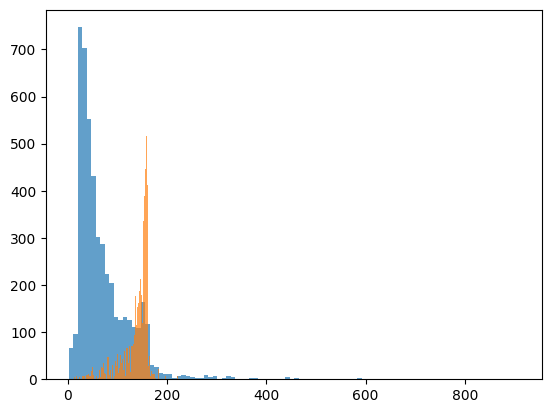

In [ ]:
# Visualization by using ham and spam
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)
plt.show()

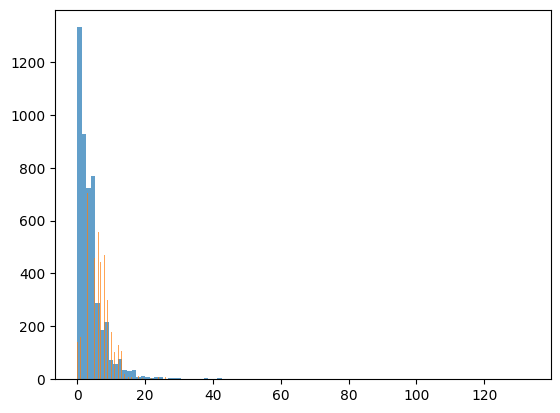

In [ ]:
plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.7)
plt.show()

In [ ]:
data.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

In [ ]:
#split data in train-test-
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data['message'],data['label'],test_size=0.3,random_state=101)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(6755,) (2895,) (6755,) (2895,)


In [ ]:
#building classification model - 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
#pipeline package to merge nlp and ml together -
from sklearn.pipeline import Pipeline

In [ ]:
cls = Pipeline([('tfidf',TfidfVectorizer()),('classifier',RandomForestClassifier())])

In [ ]:
cls

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
cls.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
y_pred_train = cls.predict(x_train)
y_pred_test = cls.predict(x_test)

In [ ]:
y_pred_train

array(['ham', 'ham', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [ ]:
#prediction -
y_pred_test

array(['spam', 'ham', 'ham', ..., 'ham', 'ham', 'spam'], dtype=object)

In [ ]:
# evaluation - 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
confusion_matrix(y_test,y_pred_test)

array([[1466,    0],
       [   0, 1429]])

In [ ]:
print(classification_report(y_train,y_pred_train))
print('****'*2)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3359
        spam       1.00      1.00      1.00      3396

    accuracy                           1.00      6755
   macro avg       1.00      1.00      1.00      6755
weighted avg       1.00      1.00      1.00      6755

********
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      1466
        spam       1.00      1.00      1.00      1429

    accuracy                           1.00      2895
   macro avg       1.00      1.00      1.00      2895
weighted avg       1.00      1.00      1.00      2895



In [ ]:
print(accuracy_score(y_train,y_pred_train))
print('****'*2)
print(accuracy_score(y_test,y_pred_test))

1.0
********
1.0


In [ ]:
# sota models - word2vec,BERT

In [ ]:
# check model performance
test1 = ['hello, hope u are fine']
test2 = ['congratulation, you won 1crore prize!! call on @123456 to claim the prize']
test3 = ['call me at 4 pm jay its urgent']
test4 = ['you won lottery,hurry up click the link and claim the ticket and win amazing prizes']
test5 = ['Congrats Megna |  Shortlisted for Amazing Weekend Getaway']

In [ ]:
print(cls.predict(test1))
print(cls.predict(test2))
print(cls.predict(test3))
print(cls.predict(test4))
print(cls.predict(test5))

['ham']
['spam']
['ham']
['spam']
['ham']


In [ ]:
# Naive bayes model- 

In [ ]:
# P(A|B) = P(B|A) * P(A) / P(B)

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus =[]
for i in range(0,len(data)):
  review = re.sub('[^a-zA-Z]',' ',data['message'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word)for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus

['sent maga money yesterday oh',
 'wait call sir',
 'said kiss kiss sound effect gorgeou man kind person need smile brighten day',
 'uh head much left',
 'play one day last year know even though good team like india',
 'night night see tomorrow',
 'ye complet form clark also utter wast',
 'also cbe pay',
 'captain room',
 'call said choos futur',
 'oki go yan jiu skip ard oso go cine den go mrt one blah blah blah',
 'k give kvb acc detail',
 'ello babe u ok',
 'seem unnecessarili affection',
 'quit late lar ard anyway wun b drivin',
 'ok tell stay yeah tough optimist thing improv month',
 'left alreadi orchard',
 'miser tell u side effect birth control massiv gut wrench cramp first month sleep last night',
 'haha heard text around',
 'sorri complet forgot pop em round week still',
 'oh rite well im best mate pete went week geva longer week',
 'daili text favour time',
 'thnx dude u guy nite',
 'sch neva mind u eat st lor',
 'oh yeah hav great time newquay send postcard look girl im gon

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(corpus).toarray()

In [ ]:
y = pd.get_dummies(data['label'])
y = y.iloc[:,1].values

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(x_train,y_train)
y_pred_train_nb = spam_detect_model.predict(x_train)
y_pred_test_nb = spam_detect_model.predict(x_test)

In [ ]:
print(classification_report(y_train,y_pred_train_nb))
print('****'*2)
print(classification_report(y_test,y_pred_test_nb))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3359
           1       0.98      0.99      0.98      3396

    accuracy                           0.98      6755
   macro avg       0.98      0.98      0.98      6755
weighted avg       0.98      0.98      0.98      6755

********
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1466
           1       0.97      0.99      0.98      1429

    accuracy                           0.98      2895
   macro avg       0.98      0.98      0.98      2895
weighted avg       0.98      0.98      0.98      2895



# Restraunt reviews - 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Restaurant_Reviews.tsv to Restaurant_Reviews.tsv


In [ ]:
df = pd.read_csv('/content/Restaurant_Reviews.tsv',sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [ ]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [ ]:
#check imbalance dataset - 
df['Liked'].value_counts()/(len(df))*100

1    50.0
0    50.0
Name: Liked, dtype: float64

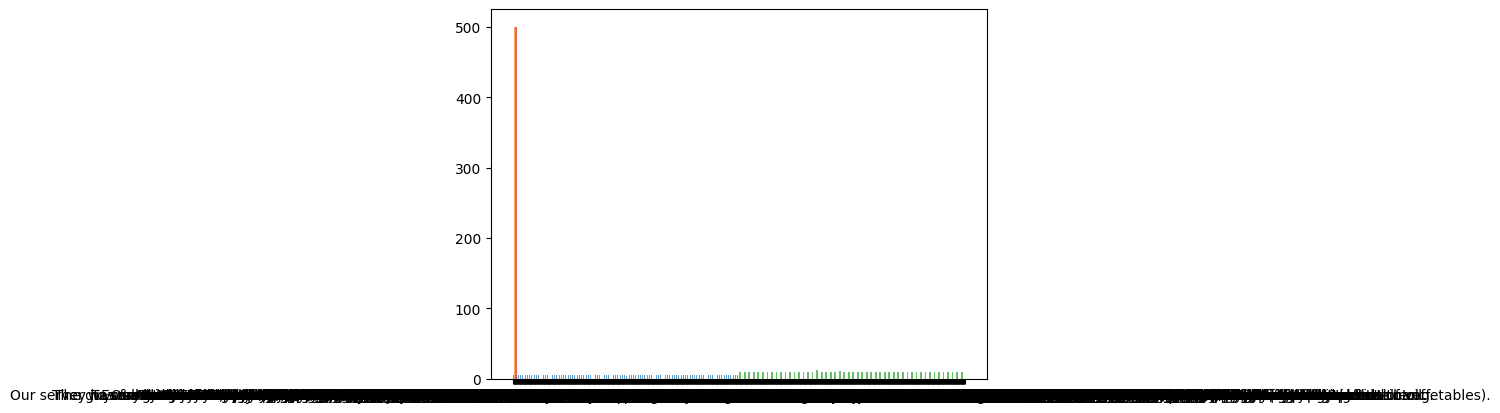

In [ ]:
# Visualization by using ham and spam
plt.hist(df[df['Liked']==1],bins=100,alpha=0.7)
plt.hist(df[df['Liked']==0],bins=100,alpha=0.7)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df['Review'],df['Liked'],test_size=0.3,random_state=101)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(700,) (300,) (700,) (300,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
#pipeline package to merge nlp and ml together -
from sklearn.pipeline import Pipeline

In [ ]:
cls = Pipeline([('tfidf',TfidfVectorizer()),('classifier',RandomForestClassifier())])

In [ ]:
cls.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
y_pred_train = cls.predict(x_train)
y_pred_test = cls.predict(x_test)

In [ ]:
y_pred_train

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,

In [ ]:
y_pred_test

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0])

In [ ]:
print(classification_report(y_train,y_pred_train))
print('****'*2)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       350

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

********
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       150
           1       0.76      0.79      0.77       150

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



In [ ]:
t1 = ['place was good but food was bad']
t2 = ['service was fine but crowd was poor']
t3 = ['manager was amazing']
t4 = ['food is good but prices are damn too high and it is not worth it']
t5 = ['best place to eat']
t6 = ['best place ']

In [ ]:
# 
print(cls.predict(t1))
print(cls.predict(t2))
print(cls.predict(t3))
print(cls.predict(t4))
print(cls.predict(t5))
print(cls.predict(t6))

[1]
[0]
[1]
[0]
[1]
[1]


In [ ]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
